In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import chardet
import re
from wordcloud import WordCloud


In [3]:
file_path = '/content/drive/My Drive/binar/gold-challenge/data.csv'
dictionary_path = '/content/drive/My Drive/binar/gold-challenge/new_kamusalay.csv'
dictionary = pd.read_csv(dictionary_path, header=None, names=['slang', 'formal'], encoding='ISO-8859-1')
def text_cleansing(text):
    cleaned_text = re.sub(r'[^a-zA-Z\s]', '', text)  # Hanya menyisakan huruf, angka, dan spasi
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text)  # Mengganti spasi berlebih dengan satu spasi
    cleaned_text = cleaned_text.strip()  # Menghapus spasi di awal dan akhir teks
    return cleaned_text

def text_processing(text, dictionary):
    for _, row in dictionary.iterrows():
        slang = row['slang']
        formal = row['formal']
        text = re.sub(r'\b{}\b'.format(re.escape(slang)), formal, text, flags=re.IGNORECASE)
    return text

def processing(text, dictionary):
    text = text_cleansing(text)
    # text = text_processing(text, dictionary)
    return text

In [7]:
with open(file_path, 'rb') as f:
    raw_data = f.read()
result = chardet.detect(raw_data)
encoding = result['encoding']
confidence = result['confidence']
print(f'Detected encoding: {encoding} with confidence {confidence}')
try:
    # Baca ulang file dengan encoding yang terdeteksi
    df = pd.read_csv(file_path, encoding=encoding)
except UnicodeDecodeError as e:
    print(f'UnicodeDecodeError with detected encoding {encoding}: {e}')
    # Jika deteksi encoding gagal, coba beberapa encoding umum lainnya
    encodings_to_try = ['latin1', 'iso-8859-1', 'cp1252']
    for enc in encodings_to_try:
        try:
            df = pd.read_csv(file_path, encoding=enc)
            break
        except UnicodeDecodeError as e:
            print(f'UnicodeDecodeError with fallback encoding {enc}: {e}')
            continue
    else:
        print(f'File encoding not supported with detected encoding {encoding}: {e}')
for column in df.columns:
    if df[column].dtype == object:  # Hanya membersihkan kolom yang bertipe objek (teks)
        df[column] = df[column].apply(lambda x: processing(x, dictionary))

df.columns
# df['Tweet'] = df['Tweet'].apply(lambda x: text_processing(x, dictionary))
# df.head()


Detected encoding: ISO-8859-1 with confidence 0.729489209991448


Index(['Tweet', 'HS', 'Abusive', 'HS_Individual', 'HS_Group', 'HS_Religion',
       'HS_Race', 'HS_Physical', 'HS_Gender', 'HS_Other', 'HS_Weak',
       'HS_Moderate', 'HS_Strong'],
      dtype='object')

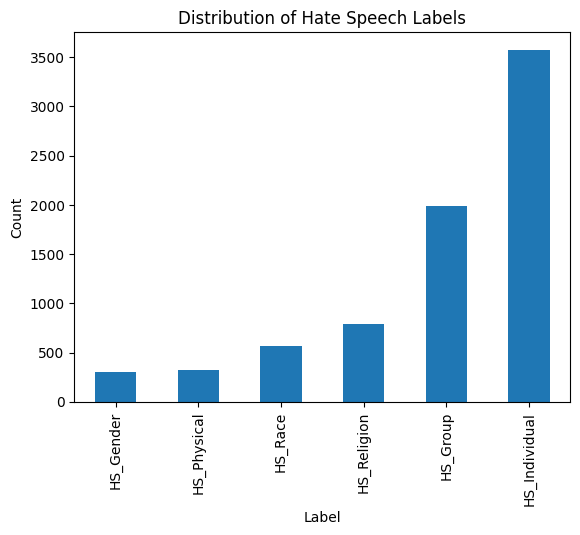

In [13]:
label_counts = df[['HS_Individual', 'HS_Group', 'HS_Religion',
       'HS_Race', 'HS_Physical', 'HS_Gender']].sum()
label_counts = label_counts.sort_values()
label_counts.plot(kind='bar')

plt.title('Distribution of Hate Speech Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


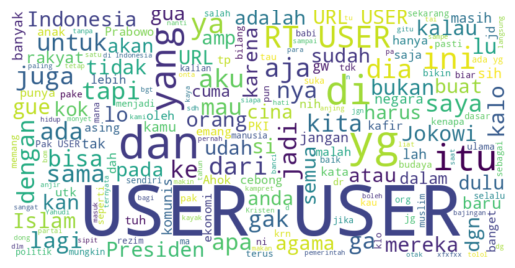

In [ ]:
text = ' '.join(df['Tweet'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

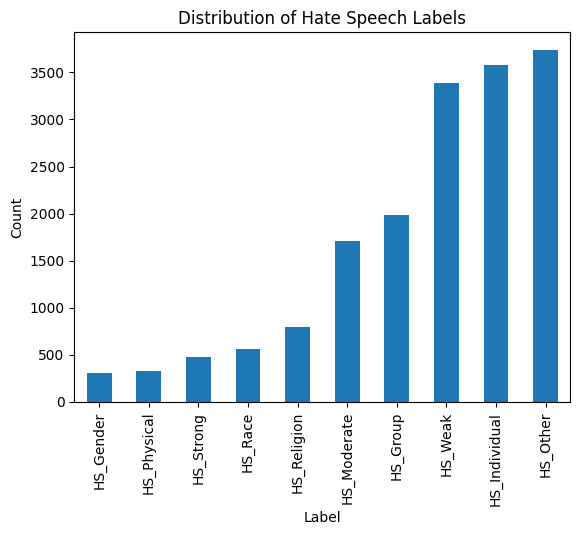

In [14]:
label_counts = df[['HS_Individual', 'HS_Group', 'HS_Religion',
       'HS_Race', 'HS_Physical', 'HS_Gender', 'HS_Other', 'HS_Weak',
       'HS_Moderate', 'HS_Strong']].sum()
label_counts = label_counts.sort_values()
label_counts.plot(kind='bar')

plt.title('Distribution of Hate Speech Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()
